# Martim Esteves, 46953

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 11-November-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I 

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class means whether a patient has breast cancer or not. The two categories are: malignant and benign.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).


In [80]:
# This code cell does not need to be changed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

dataFileName = os.path.join( "breastcancer.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Question 1 (5 points out of 20)

Project the thirty-dimensional Breast Cancer data to two-dimensional principal components. Use PCA and tSNE approaches. For each approach plot the result and then compare them.


Additionally help: 
For this dataset, it is important to normalize the input features but this topic was not discuss in class. 

To do so, before applying the fit_transform function run this piece of code: 

features = StandardScaler().fit_transform(features). (replace features by the name of your variable)

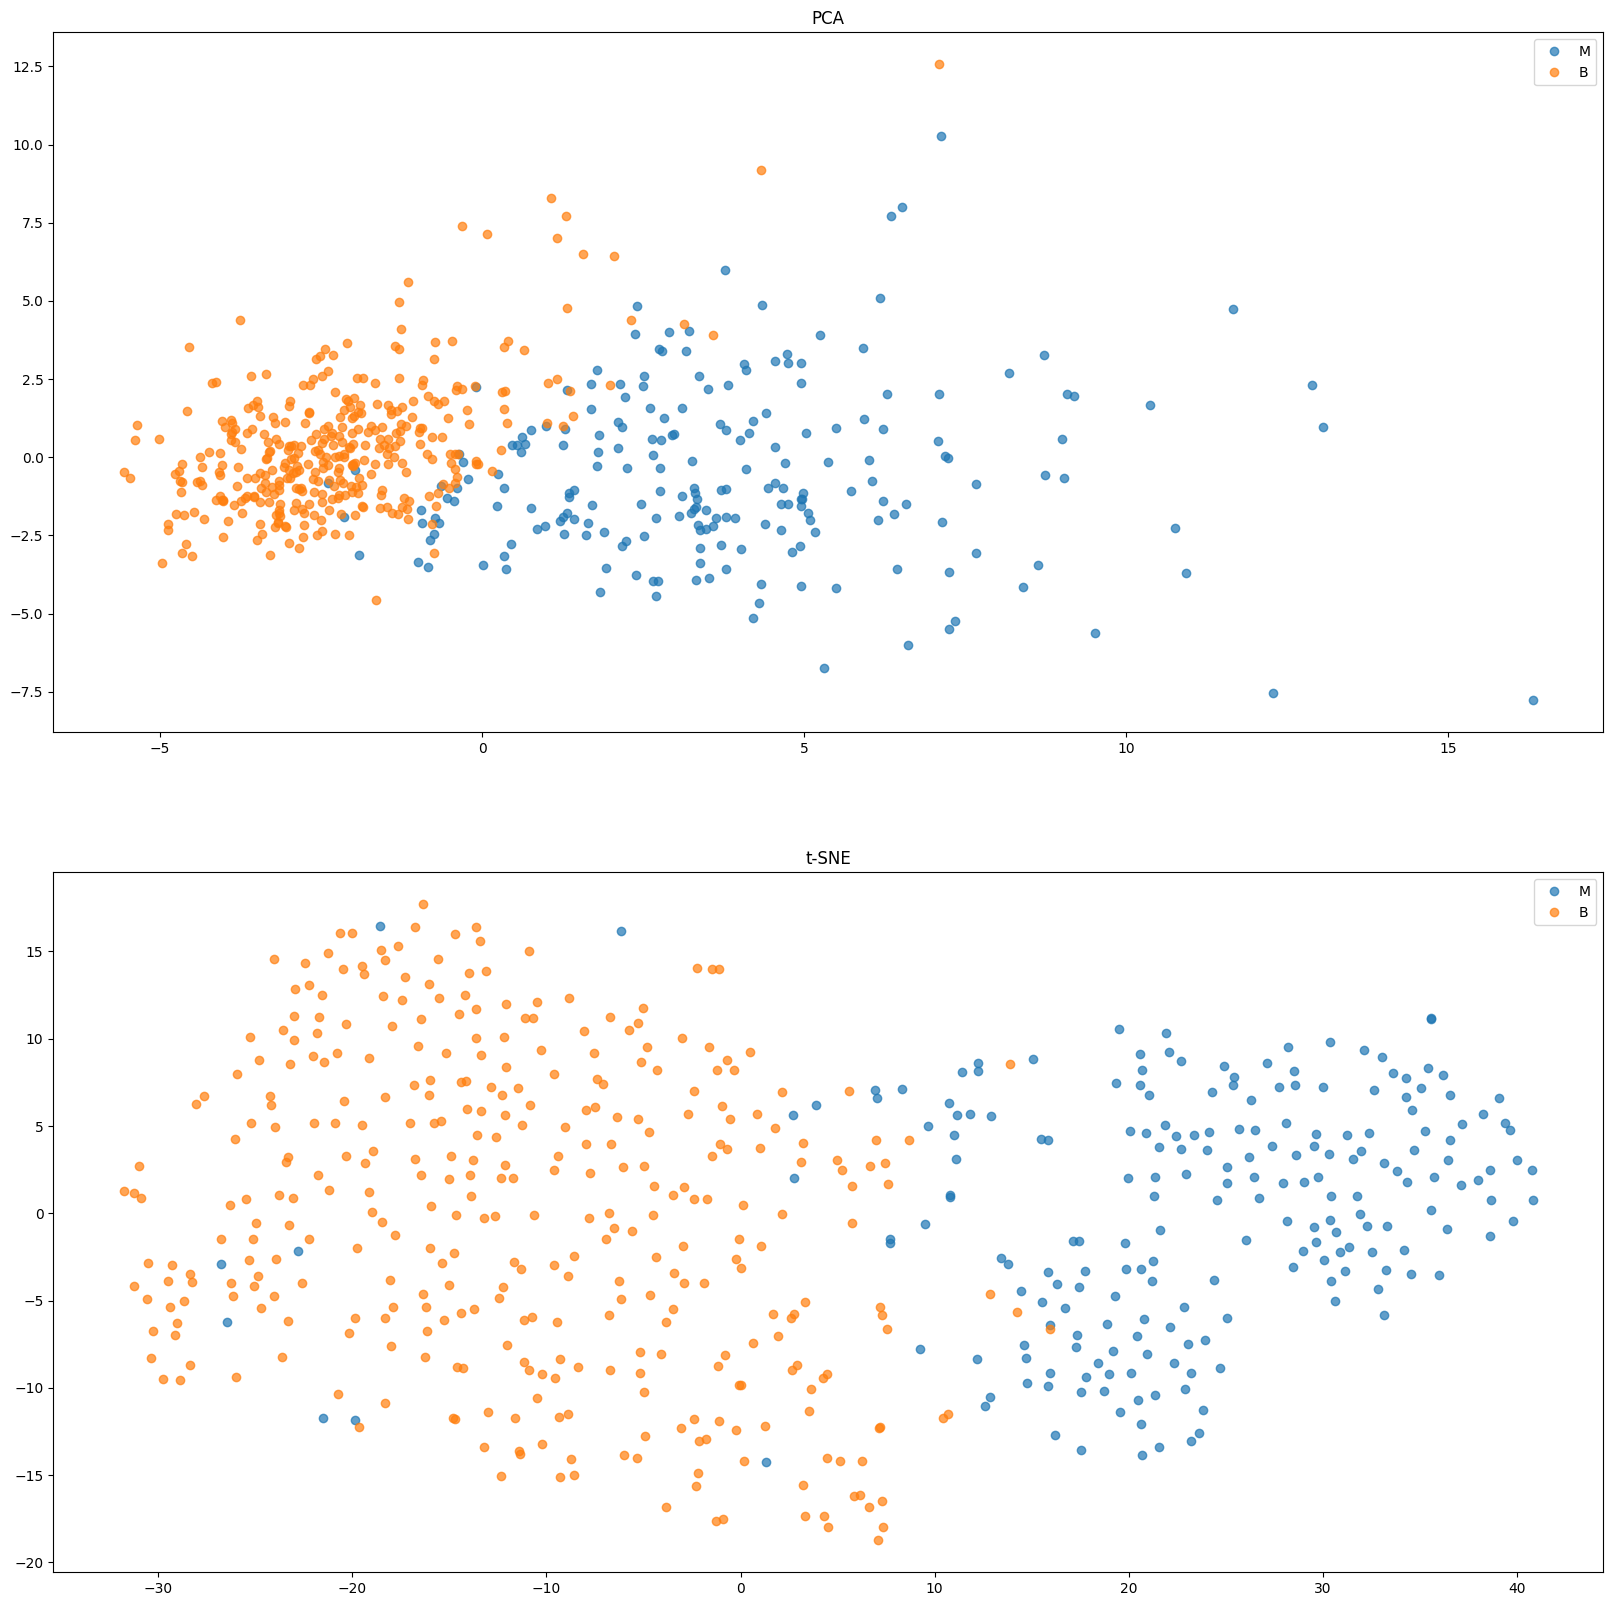

In [82]:
features = StandardScaler().fit_transform(dataDF.iloc[:,2:].values)
pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(features)

# Color code based on diagnosis
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
for diagnnosis in dataDF['diagnosis'].unique():
    mask = dataDF['diagnosis'] == diagnnosis
    plt.plot(reduced_pca[mask,0], reduced_pca[mask,1], 'o', alpha=0.7, label=diagnnosis)
plt.title('PCA')
plt.legend() 

reduced_tsne = TSNE(n_components=2).fit_transform(features)
plt.subplot(2,1,2)
for diagnosis in dataDF['diagnosis'].unique():
    mask = dataDF['diagnosis'] == diagnosis
    plt.plot(reduced_tsne[mask,0], reduced_tsne[mask,1], 'o', alpha=0.7, label=diagnosis)
plt.title('t-SNE')
plt.legend()

plt.show()



### Comparison between PCA and t-SNE:

#### Theory Recap:
The PCA algorithm works by applying linear mapping of the data to the lower-dimensional space, by identifying the directions (principal components) that maximize the variation of the data and prioritizing them, while removing non-essential parts with fewer variation. Consequently, it is better at preserving the global structure of the original data, but it is more sensitive to outliers or noise, and sometimes applying a linear algorithm or prioritizing components with higher variance is not the best approach.


The t-SNE algorithm, on the other hand, works by reducing the dimensionality of the data by calculating the probability of a point to be a neighbor of another point, and then calculating the probability of the points to be neighbors in the lower-dimensional space. So, it focuses on minimizing the divergence between these two distributions, and as a consequence are more effective at dealing with data with complex structures / high dimensionality, as well as being more robust to outliers and noise. Additionaly, by not focusing exclusively on high variance components and by implementing a non-linear approach, it might be more suitable to finding patterns in the data that are present in local relationships (which are well preserved with t-SNE). However, it is not as good at preserving the global structure of the original data like PCA is.

#### Comparing the Plots:

Comparing the two plots, we can observe that the clusters in the first graph are more compact and well defined, while in the second graph the clusters are more spread out and less well defined. This is a consequence of the fact that PCA is better at preserving the global structure of the original data, while t-SNE is better at preserving local relationships. So, in this case, the clusters are more well defined in the PCA plot, but the t-SNE plot might be better at finding patterns in the data that are present in local relationships.

Also, the clusters in the first graph seem to be seperated by a linear boundarie following a combination of the two principal components expressed in the axis, while the second plot's clusters have more non-linear boundaries between the two. Within the clusters themselves, the first plot shows a more linear distribution of the points, while the second plot shows a more non-linear distribution of the points.

## Question 2 ( 1 points out of 20)

What can you tell about the two types of tumors? Are they easily differentiated by the features computed from a digitized image? Why?

From the PCA we can posit that there is, to some degree, linear seperability between the two categories of tumours based on the used features, as we can identify a linear boundary that clearly seperates the two clusters. However, the clusters meet at a point in the center of the graph, indicating that although the features are significant to identify patterns and seprate the two types of tumours, there may be cases where we falsely diagnose based on the features alone. This is further supported by the t-SNE plot, since it preserves local relationships and the clusters seem to overlap, meaning that there are cases where the features are not enough to differentiate the two types of tumours.

In the PCA graph we can also see that the malignant tumour is more to the right that the benign tumour, but is generally at the same y axis range. This means that the features included in the first Principal Component might contain features that would allow us to accurately make a distinction, while the opposite happens in the features included in the second Principal Component.

Finally, the t-SNE plot's benign cluster is more spread out than the malign cluster, meaning that the cluster of benign tumours is more diverse than the benign when accounting to the local context of the data, a pattern that did not show up in the inicial PCA plot.

Now that we have laid out the main conclusions of the two plots, we can assess the degree to which we can differentiate tumours. We can say that we can, for the most part, differentiate the two tumours, as the PCA indicates that there are major axis (as combinations of features) that we can use to linearly classify most of the data correctly. However, the overlap the data towards the middle of the PCA plot shows that there are some cases where it is extremely difficult to differentiate the two tumours based on the features alone. Additionally, we can observe in the t-SNE plot that there is a complex relationship within each category itself, which may indicate the presence of sub-categories within each type of tumour or very complext patterns that are not able to be identified with the digitized image's features.

So, to conclude, in most cases the features should be able to accurately predict the type of tumour, but there should be a specific range where the features alone are very ineffective.

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [ ]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [ ]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Question 1 (6 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

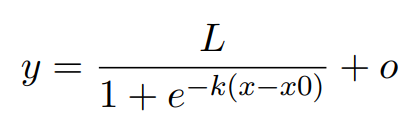

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


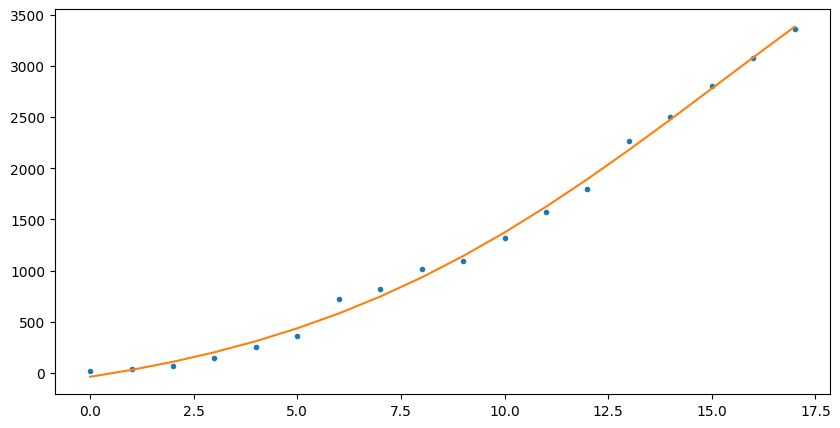

In [ ]:
# Since the dataset has only 18 rows, it is not appropriate to split it into training and test sets
def logistic(x,x0,L,k):
    return L/(1 + np.exp(-k*(x-x0)))

def log_cost(parameters, data):
    x0,L,k,offset = parameters
    pred = logistic(data.iloc[:,0],x0,L,k) + offset
    return np.mean( (pred-data.iloc[:,1])**2)

st_params = [10,1000,0.1,-300]
plt.figure(figsize=(10,5))
res=minimize(log_cost,st_params,args=(dataset_df))
x0,L,k,offset = res.x

pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],pred)
plt.show()

In [ ]:
print('x0: ', x0, '\nL: ', L, '\nk: ', k, '\noffset: ', offset)

x0:  15.221605922755803 
L:  6462.56223560484 
k:  0.1887077588220518 
offset:  -384.7626404828454


### Parameter explanation:

- x0: point where function reaches its midpoint and y = L/2, i.e. the inflection point where function shifts from convex to concave.
- L: upper vertical (y) limit to which function is asymptotically approaching. 
- k: determines the steepness, or the rate of exponential growth of the function.
- offset: constant added to the logistic function that shifts the curve vertically.


## Question 2 (3 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0, 0.5, 'Residual Value')

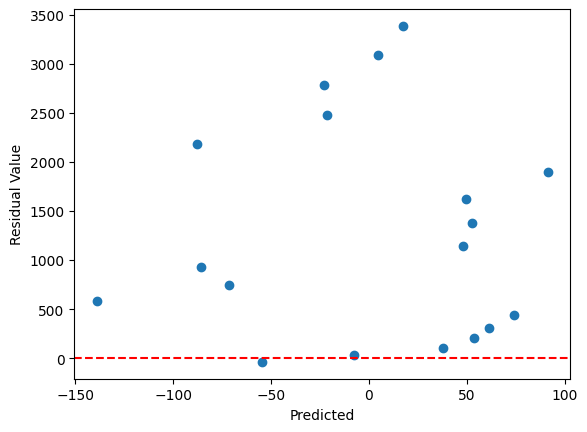

In [ ]:
residuals = pred - dataset_df.iloc[:,1]

plt.scatter(residuals,pred )
plt.axhline(y=residuals.mean(), color='r', linestyle='--')  # add mean line for assessment purposes
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

### Residuals explanation:
If a model is accurately capturing the a relationship between variables, then the residuals should be random, otherwise there is some explanatory information that our model is not capturing. So, the residuals should be normally distributed with mean zero and tend to cluster towards the middle of the plot. 

Analyzing the residuals of the logistic function model we build, we do see that the mean is close to zero and that the residuals seem random. However, they are not clustered arround the middle of the plot and have a very high variance instead. 

Finally, although there are some signs that hint towards and others against the usage of the logistic function, we only have 18 data points so we should be careful to not make final conclusions about the model without more data.

## Question 3 (5 points out of 20)

Display the 95% interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

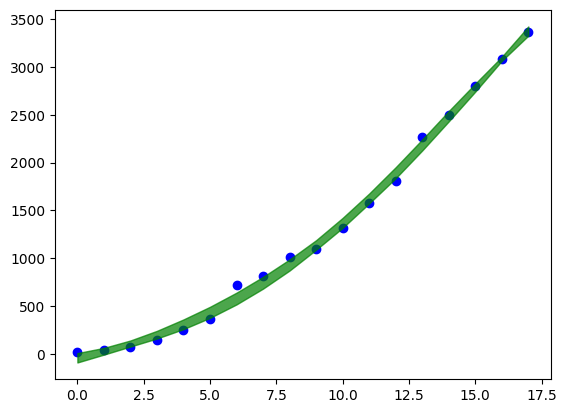

In [ ]:
params = []
replicas = 100

df_unc = pd.DataFrame(dataset_df.iloc[:,0])

# Calculate replicas:
for _ in range(replicas):
    rep_data = dataset_df.copy() 
    rep_data.iloc[:,1] = pred + residuals*np.random.normal(size=dataset_df.shape[0])

    res=minimize(log_cost,st_params,args=(rep_data))
    params.append(res.x)
    x0,L,k,offset = res.x
    pred_replica = logistic(dataset_df.iloc[:,0],x0,L,k)+offset

    df_unc =  pd.concat([df_unc, pred_replica], axis=1) 

# Plottting:
df_unc = df_unc.iloc[:, 1:replicas]
plt.scatter(dataset_df.iloc[:,0], dataset_df.iloc[:,1], color='blue')

df_unc['p2.5'] = df_unc.quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['p975'] = df_unc.quantile(0.975, axis = 1,interpolation = 'midpoint')

plt.fill_between(dataset_df.iloc[:,0], df_unc[['p2.5']].iloc[:,0], df_unc[['p975']].iloc[:,0], color='green',alpha=0.7)
plt.show()



In [ ]:
# Calculate the confidence intervals for the parameters:
params_df = pd.DataFrame(params, columns=['x0','L','k','offset'])

print('Parameters:')
display(params_df.head())
print('Confidence intervals for the parameters:')
display(params_df.quantile([0.025,0.975], interpolation='midpoint'))

Parameters:


,x0,L,k,offset
0,16.207970,7162.267106,0.174561,-444.566920
1,13.503220,5222.941164,0.232017,-239.003796
2,12.849518,4749.855786,0.250992,-187.606509
3,22.791041,12936.164525,0.115830,-955.169975
4,12.658347,4691.243804,0.252978,-190.531177


Confidence intervals for the parameters:


,x0,L,k,offset
0.025,12.777092,4764.521572,0.137874,-683.130470
0.975,20.562793,10667.450529,0.253586,-178.647784
